Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [54]:
!pip install pymystem3

In [55]:
import re

In [56]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [57]:
from nltk.tokenize import word_tokenize

In [58]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [59]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [60]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

In [61]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [62]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [63]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [64]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [65]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [66]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [67]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [68]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [69]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [70]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [71]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [72]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [73]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [74]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [75]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [76]:
mystem.analyze('сплав стали')

[{'analysis': [{'lex': 'сплав', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'сплав'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [77]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [78]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [79]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [80]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

[('I', 'PRP'), ('love', 'VBP'), ('cats', 'NNS'), ('.', '.')]

In [81]:
nltk.download('averaged_perceptron_tagger_rus')
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

[nltk_data] Downloading package averaged_perceptron_tagger_rus to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_rus is already up-to-
[nltk_data]       date!


[('И', 'CONJ'),
 ('пунша', 'S'),
 ('пламень', 'S'),
 ('голубой', 'A=m'),
 ('.', 'NONLEX'),
 ('Люблю', 'V'),
 ('воинственную', 'A=f'),
 ('живость', 'S'),
 ('Потешных', 'A=pl'),
 ('Марсовых', 'A=pl'),
 ('полей', 'S'),
 (',', 'NONLEX'),
 ('Пехотных', 'A=pl'),
 ('ратей', 'S'),
 ('и', 'CONJ'),
 ('коней', 'A=f'),
 ('Однообразную', 'A=f'),
 ('красивость', 'S'),
 (',', 'NONLEX'),
 ('В', 'PR'),
 ('их', 'A-PRO'),
 ('стройно', 'ADV'),
 ('зыблемом', 'V'),
 ('строю', 'S'),
 ('Лоскутья', 'S'),
 ('сих', 'A-PRO=pl'),
 ('знамён', 'S'),
 ('победных', 'A=pl'),
 (',', 'NONLEX'),
 ('Сиянье', 'S'),
 ('шапок', 'S'),
 ('этих', 'A-PRO=pl'),
 ('медных', 'A=pl'),
 (',', 'NONLEX'),
 ('Насквозь', 'ADV'),
 ('простреленных', 'V'),
 ('в', 'PR'),
 ('бою', 'S'),
 ('.', 'NONLEX')]

Можно "подклеить" для удобства тэги к слову.

In [82]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['И_CONJ', 'пунша_S', 'пламень_S', 'голубой_A=m', '._NONLEX', 'Люблю_V', 'воинственную_A=f', 'живость_S', 'Потешных_A=pl', 'Марсовых_A=pl', 'полей_S', ',_NONLEX', 'Пехотных_A=pl', 'ратей_S', 'и_CONJ', 'коней_A=f', 'Однообразную_A=f', 'красивость_S', ',_NONLEX', 'В_PR', 'их_A-PRO', 'стройно_ADV', 'зыблемом_V', 'строю_S', 'Лоскутья_S', 'сих_A-PRO=pl', 'знамён_S', 'победных_A=pl', ',_NONLEX', 'Сиянье_S', 'шапок_S', 'этих_A-PRO=pl', 'медных_A=pl', ',_NONLEX', 'Насквозь_ADV', 'простреленных_V', 'в_PR', 'бою_S', '._NONLEX']


In [83]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

Файл успешно прочитан. Длина текста: 3571 символов
Тип переменной text_string: <class 'str'>


'A Day in the Life of a University Student\nThe shri'

In [84]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

A_DET Day_NOUN in_ADP the_DET Life_NOUN of_ADP a_DET University_NOUN Student_NOUN The_DET shrill_NOUN sound_NOUN of_ADP my_PRON alarm_NOUN pierces_NOUN through_ADP the_DET darkness_NOUN at_ADP 6:30_NUM AM_NOUN ._. I_PRON groan_VERB and_CONJ reach_VERB for_ADP my_PRON phone_NOUN ,_. hitting_VERB snooze_ADJ one_NUM more_ADJ time—a_ADJ daily_ADJ ritual_NOUN that_DET buys_VERB me_PRON those_DET precious_ADJ ten_ADJ minutes_NOUN of_ADP extra_ADJ sleep_NOUN ._. When_ADV I_PRON finally_ADV drag_VERB myself_PRON out_ADP of_ADP bed_NOUN ,_. the_DET small_ADJ dorm_NOUN room_NOUN is_VERB still_ADV dark_ADJ ,_. my_PRON roommate_NOUN 's_PRT gentle_ADJ snoring_VERB a_DET reminder_NOUN that_ADP not_ADV everyone_NOUN has_VERB early_ADJ morning_NOUN lectures_NOUN ._. Morning_NOUN classes_NOUN are_VERB always_ADV a_DET challenge_NOUN ._. I_PRON quickly_ADV shower_VERB ,_. grab_VERB a_DET granola_NOUN bar_NOUN ,_. and_CONJ fill_VERB my_PRON travel_NOUN mug_NOUN with_ADP coffee—the_ADJ lifeblood_NOUN of_A

Сколько у нас частей речи определенного вида?

In [85]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

Your text has 51 adjectives.


In [86]:
from nltk import FreqDist

In [87]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [88]:
stop_words = set(stopwords.words("english"))

In [89]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

<Axes: xlabel='Samples', ylabel='Counts'>

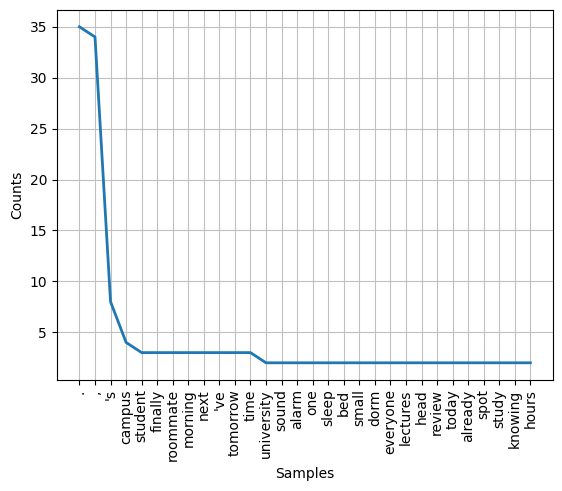

In [90]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [91]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


<Axes: xlabel='Samples', ylabel='Counts'>

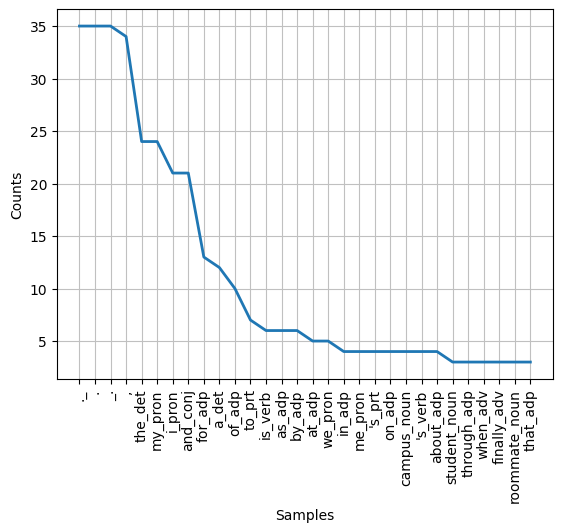

In [92]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

Результаты сравнения трёх методов


==================== 1_Токены ====================

→ 1_Токены — Русский


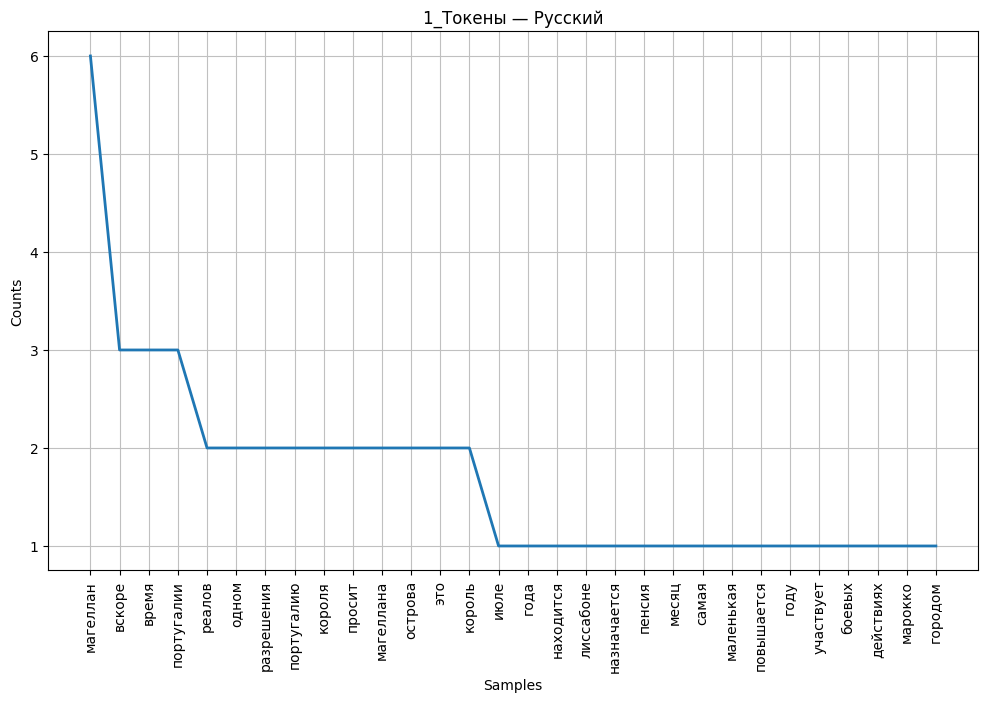

→ 1_Токены — English


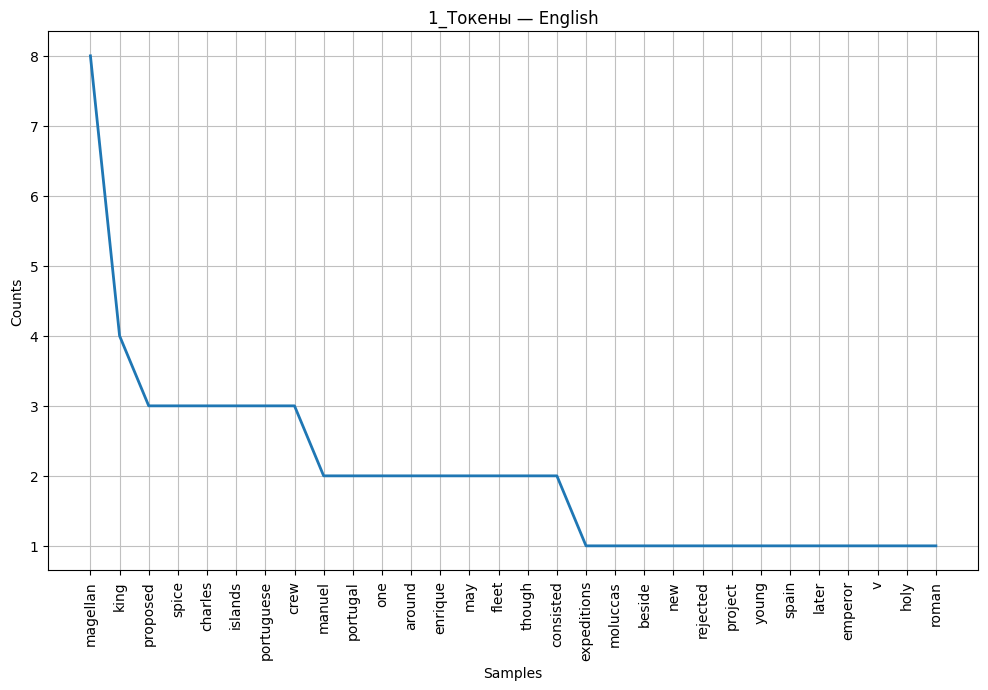


==================== 2_POS ====================

→ 2_POS — Русский


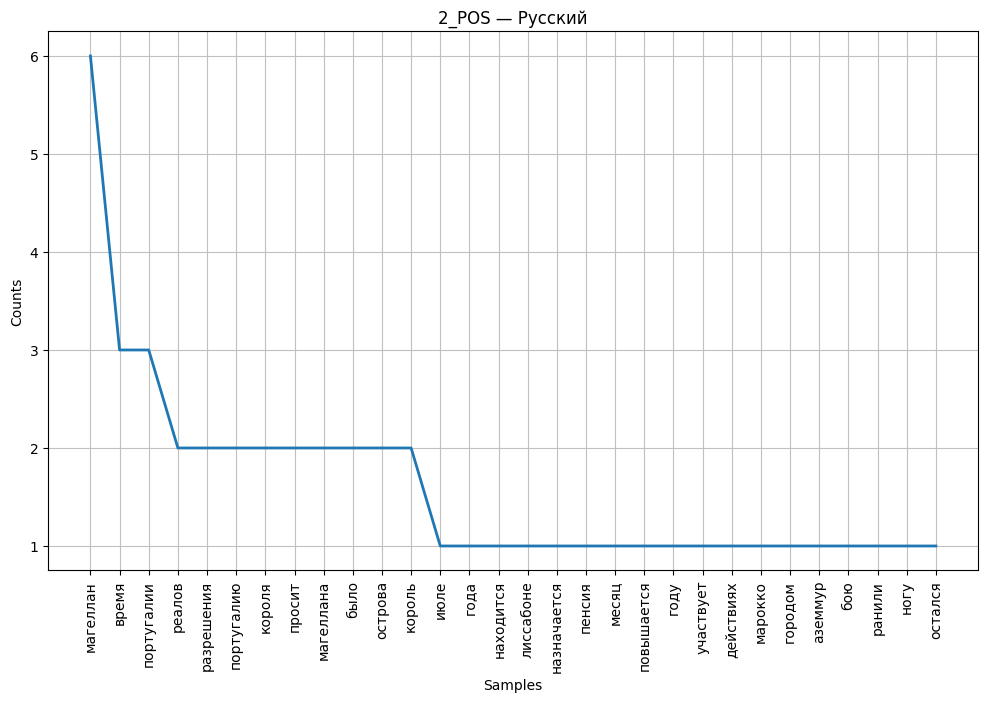

→ 2_POS — English


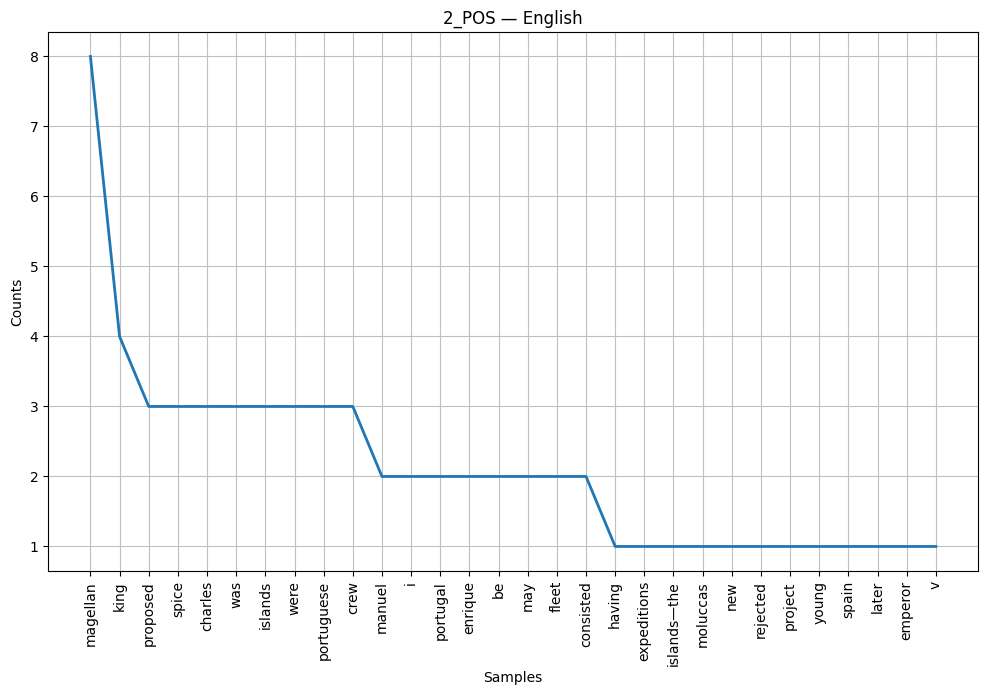


==================== 3_Леммы ====================

→ 3_Леммы — Русский


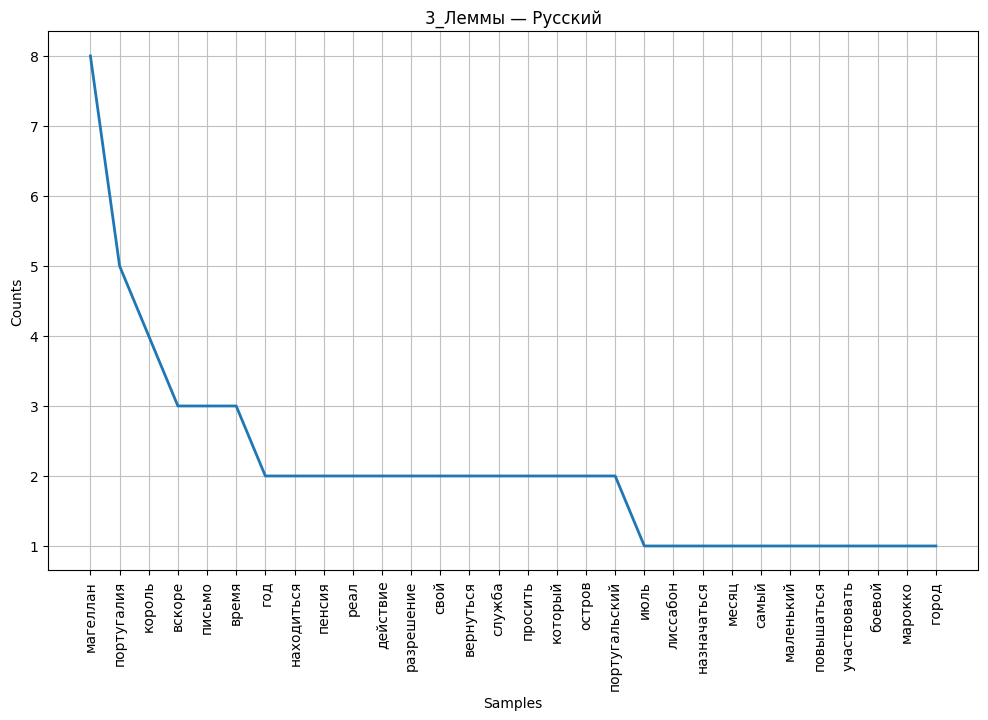

→ 3_Леммы — English


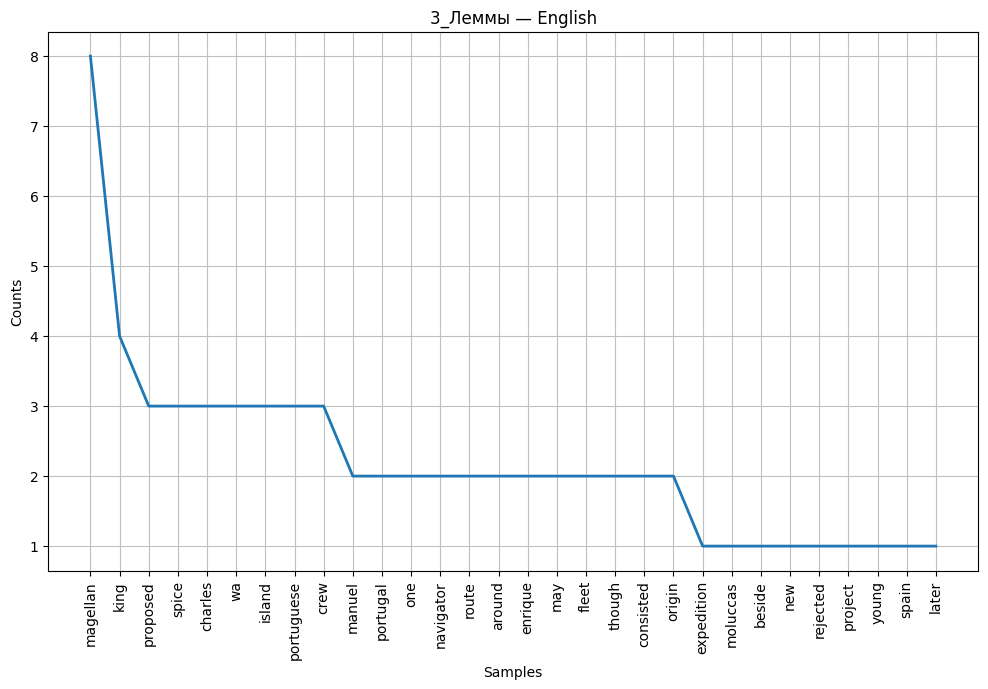

In [99]:
import matplotlib.pyplot as plt

russian_text = """
В июле 1512 года Магеллан находится уже в Лиссабоне, где ему назначается пенсия 1000 реалов в месяц (самая маленькая). Вскоре она повышается до 1850 реалов.

В 1514 году он участвует в боевых действиях в Марокко под городом Аземмур. В одном бою его ранили в ногу (он остался хромым), в другом под ним убили лошадь.
Ему поручили охранять отбитый у мавров скот, но вскоре обвинили в том, что он тайно продал маврам часть добычи.
Возмущённый Магеллан без разрешения отправился в Португалию, чтобы оправдаться.
Своими самовольными действиями он вызвал гнев короля и был вынужден вернуться к месту службы.
В Африке обвинения с него сняли, он подал в отставку и вернулся на родину. Он просит короля увеличить ему пенсию, но получает отказ.

Сложно сказать, когда у Магеллана появился замысел путешествия, которое его прославит.
Друг Серран писал с Молукк письма, из которых можно было сделать вывод, что Острова Пряностей находятся очень далеко на Востоке и сравнительно близко от Америки.
В одном из ответных писем Магеллан намекал ему, что может скоро прибыть на эти острова, «если не через Португалию, то через Кастилию».
Неизвестно, когда было написано это письмо, но вполне возможно, что ещё во время нахождения Магеллана в Португалии.
В это время он изучает доступные ему португальские карты, беседует с капитанами.

Во время одной из аудиенций с Мануэлом I Магеллан просит дать ему морскую службу и отправить в плавание. Король отказывает.
Тогда Фернан спрашивает разрешения предложить свои услуги другим государствам. Король разрешает, так как ему не нужен Магеллан.
Некоторые источники утверждают, что Магеллан отрёкся от подданства Португалии, но документов об этом не сохранилось.
Вскоре из Португалии в Испанию перебирается целая группа португальских моряков.
"""

english_text = """
After having his proposed expeditions to the Spice Islands—the Moluccas beside New Guinea—repeatedly rejected by King Manuel I of Portugal,
Magellan proposed his project to Charles I, the young king of Spain (later emperor Charles V of the Holy Roman Empire) and became one of his subjects and navigators.
Under the terms of the 1494 Treaty of Tordesillas, Portugal was to control the eastern routes to Asia that went around the Cape of Good Hope in Africa.


Magellan instead proposed to seek a southwestern passage around South America to reach the Spice Islands by a western route, a feat never before accomplished.
Bergreen further states that Magellan claimed to Charles that his Malaccan or Sumatran slave Enrique had been a native of the Spice Islands and used
Enrique and letters from Serrão to "prove" that the islands were so far east that they would fall within the
Spanish sphere of influence if the world were truly to be divided in half.

King Manuel saw all of this as an insult and did everything in his power to disrupt Magellan's arrangements for the voyage.
The Portuguese king allegedly ordered that Magellan's properties be vandalized as it was the coat of arms of the Magellan
displayed at the family house's façade in Sabrosa, his home town, and may have even requested the assassination of the navigator.
When Magellan eventually sailed to the open seas in August 1519, a Portuguese fleet was sent after him, though it failed to capture him.

Magellan's fleet consisted of five ships carrying supplies for two years of travel.
The crew consisted of about 270 men of different origins,[29] though the numbers may
vary downward among scholars based on contradicting data from the many documents available.
About 60 percent of the crew were Spaniards from virtually all regions of Castile.
Portuguese and Italians followed with 28 and 27 seamen respectively, while mariners from
France (15), Greece (8), Flanders (5), Germany (3), Ireland (2), England and Malaysia (one each) and other people of unidentified origin completed the crew.
"""

def clean_text(text):
    text = re.sub(r'\s+', ' ', text.strip())
    return text.lower()

russian_clean = clean_text(russian_text)
english_clean = clean_text(english_text)


def method1_tokens(text, lang='english'):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]
    stop_words = set(stopwords.words('russian' if lang == 'russian' else 'english'))
    filtered = [t for t in tokens if t not in stop_words]
    return filtered

# Import pos_tag from nltk
from nltk import pos_tag

def method2_pos(text, lang='english'):
    tokens = word_tokenize(text)
    if lang == 'russian':
        tagged = pos_tag(tokens, lang='rus')
        important = ['S', 'A', 'V']
    else:
        tagged = pos_tag(tokens, tagset='universal')
        important = ['NOUN', 'ADJ', 'VERB']

    filtered = [word for word, tag in tagged if tag in important]
    return filtered


def method3_lemmas(text, lang='english'):
    if lang == 'russian':
        m = Mystem()
        lemmas = m.lemmatize(text)
        lemmas = [l for l in lemmas if l.strip() and l.isalpha()]
        stop_words = set(stopwords.words('russian'))
        filtered = [l for l in lemmas if l not in stop_words]
        return filtered
    else:
        from nltk.stem import WordNetLemmatizer
        nltk.download('wordnet', quiet=True)
        lemmatizer = WordNetLemmatizer()
        tokens = word_tokenize(text)
        lemmas = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha()]
        stop_words = set(stopwords.words('english'))
        filtered = [l for l in lemmas if l not in stop_words]
        return filtered


methods = {
    '1_Токены': {
        'ru': method1_tokens(russian_clean, 'russian'),
        'en': method1_tokens(english_clean)
    },
    '2_POS': {
        'ru': method2_pos(russian_clean, 'russian'),
        'en': method2_pos(english_clean)
    },
    '3_Леммы': {
        'ru': method3_lemmas(russian_clean, 'russian'),
        'en': method3_lemmas(english_clean)
    }
}

# Визуализация
def plot_top30(words, title):
    freq = FreqDist(words)
    plt.figure(figsize=(12, 7))
    freq.plot(30, title=title, cumulative=False)
    plt.show()


print("Результаты сравнения трёх методов\n")

for method_name, lang_data in methods.items():
    print(f"\n{'='*20} {method_name} {'='*20}\n")

    for lang, words in lang_data.items():
        lang_name = "Русский" if lang == 'ru' else "English"
        title = f"{method_name} — {lang_name}"
        print(f"→ {title}")
        plot_top30(words, title)
